In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
def compute_cost(b, m, points):
    total_cost = 0
    N = len(points)
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
    return total_cost / N

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations, x_multiplier=1.0, y_multiplier=1.0, pause_time=0.1):
    b = starting_b
    m = starting_m
    cost_graph = []
    path_b = []  # Um die Schritte von b zu speichern
    path_m = []  # Um die Schritte von m zu speichern

    # Initialisiere den Plot mit zwei Subplots (1 Reihe, 2 Spalten)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Scatterplot der Datenpunkte im ersten Subplot
    ax1.scatter(points[:, 0], points[:, 1], color='blue')

    # Berechne die maximalen Werte der X- und Y-Achse
    x_min, x_max = points[:, 0].min(), points[:, 0].max()
    y_min, y_max = points[:, 1].min(), points[:, 1].max()

    # Dynamische Anpassung der X-Achse basierend auf den Lernratenparametern
    ax1.set_xlim(x_min - x_multiplier * (x_max - x_min), x_max + x_multiplier * (x_max - x_min))
    ax1.set_ylim(y_min - y_multiplier * (y_max - y_min), y_max + y_multiplier * (y_max - y_min))

    # Linie initialisieren (Initialwert für die Regressionsgerade)
    line_x = np.linspace(x_min - x_multiplier * (x_max - x_min), x_max + x_multiplier * (x_max - x_min), 100)  # x-Werte für die Gerade
    line, = ax1.plot(line_x, starting_m * line_x + starting_b, color='red')

    # Subplot für den Gradientenabstieg (Kosten)
    ax2.set_xlim(1, num_iterations)  # Iterationen auf der x-Achse des Gradientenabstiegs
    ax2.set_ylim(0, 1.1 * max(cost_graph, default=1))  # Kosten auf der y-Achse des Gradientenabstiegs
    ax2.set_xticks(range(1, num_iterations + 1))  # Setze die xticks als Ganzzahlen von 1 bis num_iterations
    ax2.set_xticklabels(range(1, num_iterations + 1))  # Zeige die xticks als Ganzzahlen an
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Kosten')
    ax2.set_title('Kostenverlauf (Gradientenabstieg)')

    for i in range(num_iterations):
        cost = compute_cost(b, m, points)
        cost_graph.append(cost)

        # Speichern der aktuellen Parameter
        path_b.append(b)
        path_m.append(m)

        # Update der Parameter
        b, m = step_gradient(b, m, np.array(points), learning_rate)

        # Aktualisiere die Linie (Regressionsgerade)
        line.set_ydata(m * line_x + b)

        # Aktualisiere den Verlauf der Kosten
        ax2.clear()  # Löscht den vorherigen Verlauf der Kosten
        ax2.set_xlim(1, num_iterations)  # Setze die x-Achse erneut auf 1 bis num_iterations
        ax2.set_ylim(0, 1.1 * max(cost_graph, default=1))  # Y-Achse anpassen
        ax2.set_xticks(range(1, num_iterations + 1))  # Setze die xticks als Ganzzahlen von 1 bis num_iterations
        ax2.set_xticklabels(range(1, num_iterations + 1))  # Zeige die xticks als Ganzzahlen an
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Kosten')
        ax2.set_title('Kostenverlauf (Gradientenabstieg)')
        ax2.plot(range(1, i + 2), cost_graph, color='green', label="Kosten")  # Zeichne den Verlauf bis zur aktuellen Iteration
        ax2.plot(path_b, label='Intercept', linestyle='--', color="blue")
        ax2.plot(path_m, label='$Coef', linestyle='-', color="black")
        ax2.legend()

        # Füge Titel für den ersten Plot hinzu
        ax1.set_title("Datenpunkte und Regressionsgerade")
        
        # Aktualisiere den Plot
        clear_output(wait=True)
        display(fig)
        time.sleep(pause_time)  # Pause zwischen den Iterationen

    plt.close(fig)  # Schließt den interaktiven Plot am Ende
    return [b, m, cost_graph]


In [4]:
def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))

    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient
    return b_updated, m_updated

In [5]:
np.random.seed(42)

points = np.random.uniform(4, 6, size=100).reshape(-1,2)

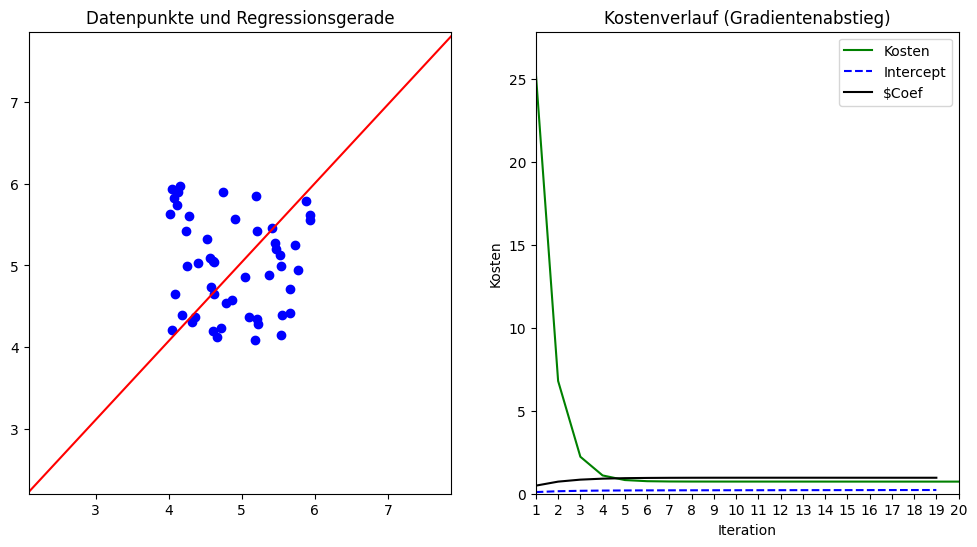

In [6]:
learning_rate = 0.01
initial_b = 0
initial_m = 0
num_iterations = 20

[b, m, cost_graph] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations,1,1, pause_time=1)